# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import statsmodels.stats.api as sms
import glob
from zedstat import zedstat

from sklearn.ensemble import (
    ExtraTreesClassifier,
    RandomForestClassifier,
)
from sklearn.metrics import (
    PrecisionRecallDisplay,
    RocCurveDisplay,
    auc,
    mean_squared_error,
    precision_recall_curve,
    r2_score,
    roc_curve,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split

# Global

In [2]:
dff = pd.concat(
    [
        pd.concat(
            [
                pd.read_csv(
                    f"disson_global/csv/{i}/disson_qmr_global_random_order_{i}-questions_asked_{questions_asked}.csv"
                ).iloc[:, np.r_[:questions_asked]],
                # .mean(axis=1, numeric_only=True),
                pd.read_csv(
                    f"disson_global/csv/{i}/disson_qmr_global_random_order_{i}-questions_asked_{questions_asked}.csv"
                )["y"],
            ],
            axis=1,
        )
        # .groupby("y", as_index=False)
        # .mean()
        .assign(questions=str(questions_asked))
        for questions_asked in range(1, 345)
        for i in range(10)
    ]
)

In [5]:
dffm = pd.melt(dff, id_vars=["y", "questions"])
dffm = dffm.query("~value.isna()")
dffm = dffm.assign(
    questions=lambda x: x["questions"].astype(int),
    variable=lambda x: x["variable"].astype(int),
)

In [29]:
dffm

,y,questions,variable,value
0,qsampled,1,0,0.00000
1,qsampled,1,0,0.00000
2,qsampled,1,0,0.00000
3,qsampled,1,0,0.00000
4,qsampled,1,0,0.00000
...,...,...,...,...
355007995,runif,344,343,0.96875
355007996,runif,344,343,0.96875
355007997,runif,344,343,0.84375
355007998,runif,344,343,0.84375


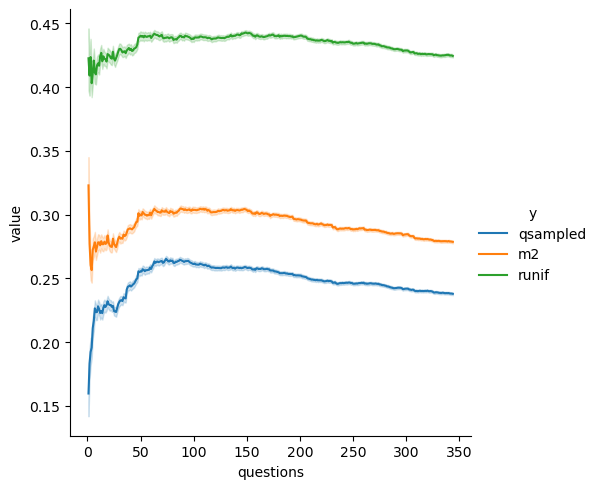

In [36]:
sns.relplot(dffm, x="questions", y="value", hue="y", kind="line")

In [35]:
res_df = list()
conf = 0.95
for questions in tqdm(range(1, 345)):
    for group in ["qsampled", "runif", "m2"]:
        dfq = dffm.query("questions==@questions & y==@group")
        mean = dfq["value"].mean()
        var = dfq["value"].var()
        ci = sms.DescrStatsW(dfq["value"]).tconfint_mean(alpha=1 - conf)
        res_df.append([group, questions, mean, var, ci[0], ci[1]])

res_df = pd.DataFrame(
    res_df, columns=["variable", "questions", "mean", "var", "lower", "upper"]
)

  0%|          | 0/344 [00:00<?, ?it/s]

In [40]:
res_df

,variable,questions,mean,var,lower,upper
0,qsampled,1,0.159790,0.077448,0.142521,0.177060
1,runif,1,0.422695,0.155514,0.398224,0.447166
2,m2,1,0.323021,0.128233,0.300800,0.345243
3,qsampled,2,0.183286,0.077509,0.171077,0.195495
4,runif,2,0.409157,0.140137,0.392740,0.425573
...,...,...,...,...,...,...
1027,runif,343,0.424920,0.139386,0.423671,0.426169
1028,m2,343,0.278869,0.111435,0.277752,0.279986
1029,qsampled,344,0.237976,0.101726,0.236910,0.239042
1030,runif,344,0.424544,0.139245,0.423297,0.425791


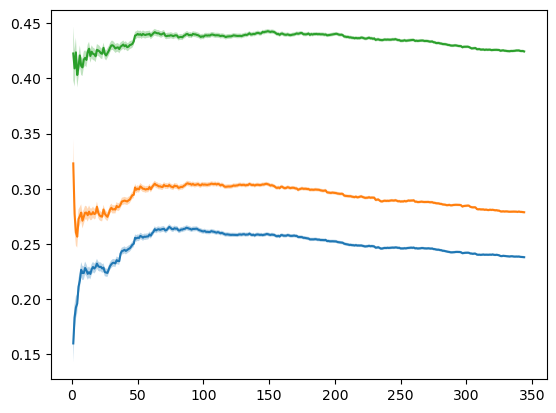

In [42]:
for v in ["qsampled", "m2", "runif"]:
    df = res_df.query("variable==@v")
    plt.plot(df["questions"], df["mean"])
    plt.fill_between(df["questions"], df["lower"], df["upper"], alpha=0.3)

In [39]:
res_df.to_csv("diss_comp_global_linear_rand_order_melt.csv", index=False)

# PTSD

In [43]:
dffp = pd.concat(
    [
        pd.concat(
            [
                pd.read_csv(
                    f"disson_ptsd/csv/{i}/disson_qmr_ptsd_random_order_{i}-questions_asked_{questions_asked}.csv"
                ).iloc[:, np.r_[:questions_asked]],
                # .mean(axis=1, numeric_only=True),
                pd.read_csv(
                    f"disson_ptsd/csv/{i}/disson_qmr_ptsd_random_order_{i}-questions_asked_{questions_asked}.csv"
                )["y"],
            ],
            axis=1,
        )
        # .groupby("y", as_index=False)
        # .mean()
        .assign(questions=str(questions_asked))
        for questions_asked in range(1, 212)
        for i in range(10)
    ]
)

In [44]:
dffpm = (
    pd.melt(dffp, id_vars=["y", "questions"])
    .query("~value.isna()")
    .assign(
        questions=lambda x: x["questions"].astype(int),
        variable=lambda x: x["variable"].astype(int),
    )
)

dffpm

,y,questions,variable,value
0,qsampled,1,0,0.000000
1,qsampled,1,0,0.726744
2,qsampled,1,0,0.726744
3,qsampled,1,0,0.668605
4,qsampled,1,0,0.883721
...,...,...,...,...
133562995,runif,211,210,0.219646
133562996,runif,211,210,0.757905
133562997,runif,211,210,0.277719
133562998,runif,211,210,0.749744


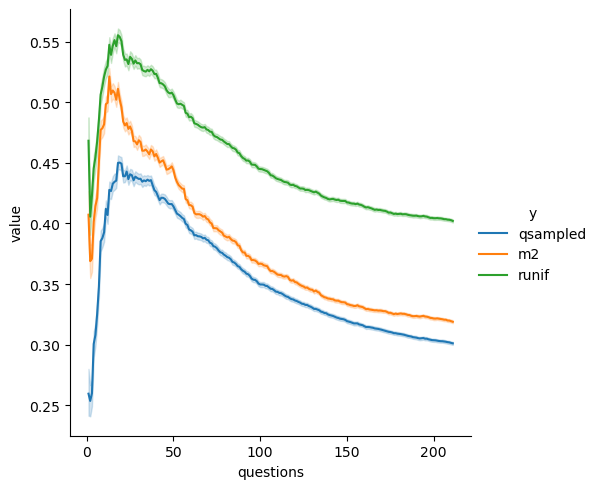

In [45]:
sns.relplot(dffpm, x="questions", y="value", hue="y", kind="line")

In [46]:
res_pdf = list()
conf = 0.95
for questions in tqdm(range(1, 345)):
    for group in ["qsampled", "runif", "m2"]:
        dfq = dffpm.query("questions==@questions & y==@group")
        mean = dfq["value"].mean()
        var = dfq["value"].var()
        ci = sms.DescrStatsW(dfq["value"]).tconfint_mean(alpha=1 - conf)
        res_pdf.append([group, questions, mean, var, ci[0], ci[1]])

res_pdf = pd.DataFrame(
    res_pdf, columns=["variable", "questions", "mean", "var", "lower", "upper"]
)

res_pdf

  0%|          | 0/344 [00:00<?, ?it/s]

/Users/ncsizemore/opt/anaconda3/envs/pkgs/lib/python3.10/site-packages/statsmodels/stats/weightstats.py:135: RuntimeWarning: invalid value encountered in scalar divide
  return self.sum / self.sum_weights
/Users/ncsizemore/opt/anaconda3/envs/pkgs/lib/python3.10/site-packages/statsmodels/stats/weightstats.py:182: RuntimeWarning: invalid value encountered in scalar divide
  return self.sumsquares / (self.sum_weights - self.ddof)
/Users/ncsizemore/opt/anaconda3/envs/pkgs/lib/python3.10/site-packages/statsmodels/stats/weightstats.py:228: RuntimeWarning: invalid value encountered in sqrt
  return std / np.sqrt(self.sum_weights - 1)


,variable,questions,mean,var,lower,upper
0,qsampled,1,0.259514,0.091344,0.240759,0.278269
1,runif,1,0.468232,0.118111,0.446905,0.489558
2,m2,1,0.407204,0.097209,0.387856,0.426552
3,qsampled,2,0.253534,0.083002,0.240900,0.266168
4,runif,2,0.405559,0.108881,0.391089,0.420030
...,...,...,...,...,...,...
1027,runif,343,NaN,NaN,NaN,NaN
1028,m2,343,NaN,NaN,NaN,NaN
1029,qsampled,344,NaN,NaN,NaN,NaN
1030,runif,344,NaN,NaN,NaN,NaN


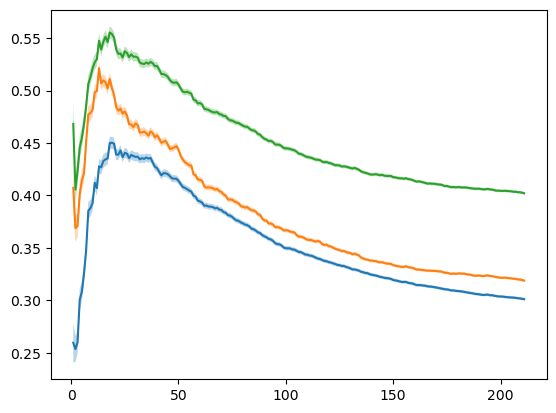

In [47]:
for v in ["qsampled", "m2", "runif"]:
    df = res_pdf.query("variable==@v")
    plt.plot(df["questions"], df["mean"])
    plt.fill_between(df["questions"], df["lower"], df["upper"], alpha=0.3)

In [48]:
res_pdf.to_csv("diss_comp_ptsd_linear_rand_order_melt.csv", index=False)